# Making a CNN model to classify the ct-scans into 2 classes: Normal and Covid-19


## Importing the libraries

In [3]:
import numpy as np
from tensorflow.keras.optimizers import RMSprop
import scipy
from keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
data_dir_covid = pathlib.Path('../dataset/COVID')
data_dir_non_covid = pathlib.Path('../dataset/non-COVID')

In [5]:
img_count_covid = len(list(data_dir_covid.glob('*.png'))) 
img_count_non_covid = len(list(data_dir_non_covid.glob('*.png'))) 

print("Image count in Covid set: ",img_count_covid)
print("Image count in Non Covid set: ",img_count_non_covid)

Image count in Covid set:  1252
Image count in Non Covid set:  1229


In [14]:
import splitfolders
splitfolders.ratio('../dataset', output="../dataset_split", seed=42, ratio=(0.8, 0, 0.2), group_prefix=None) # default values

In [15]:
train_data = pathlib.Path('../dataset_split/train')
test_data = pathlib.Path('../dataset_split/test')

In [16]:
print("Train data: ",len(list(train_data.glob('*/*.png'))))
print("Test data: ",len(list(test_data.glob('*/*.png'))))

Train data:  1984
Test data:  497


## Exploring the dataset

Text(0.5, 1.0, 'Non Covid')

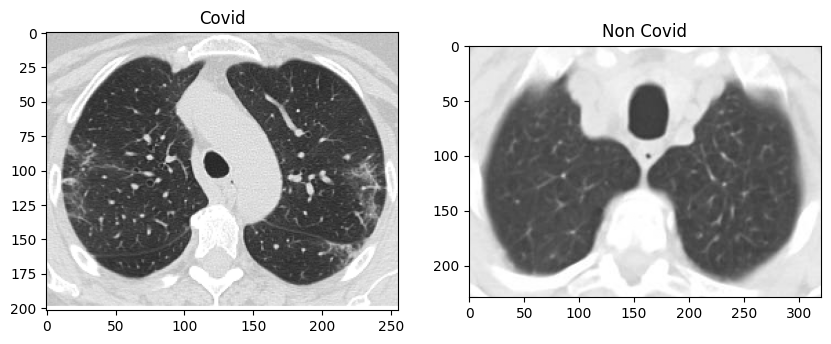

In [23]:
sample_covid = list(data_dir_covid.glob('*.png'))[0]
sample_non_covid = list(data_dir_non_covid.glob('*.png'))[0]

#show both sample image
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(plt.imread(str(sample_covid)))
plt.title("Covid")
plt.subplot(1,2,2)
plt.imshow(plt.imread(str(sample_non_covid)))
plt.title("Non Covid")



## Data Preprocessing

In [43]:
data_gen = ImageDataGenerator(rescale=1./255)

train_generator = data_gen.flow_from_directory(
    train_data,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    seed=42,
    shuffle=True
)

test_generator = data_gen.flow_from_directory(
    test_data,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    seed=42,
    shuffle=True
)

# using image augmentation
# data_gen = ImageDataGenerator(rescale=1./255,
#                               rotation_range=20,
#                               width_shift_range=0.1,
#                               height_shift_range=0.1,
#                               zoom_range=0.1,
#                               fill_mode='nearest',
#                               )

# train_generator = data_gen.flow_from_directory(
#     train_data,
#     target_size=(256, 256),
#     batch_size=32,
#     class_mode='binary',
#     color_mode='grayscale',
#     seed=42,
#     shuffle=True
# )

# test_generator = data_gen.flow_from_directory(
#     test_data,
#     target_size=(256, 256),
#     batch_size=32,
#     class_mode='binary',
#     color_mode='grayscale',
#     seed=42,
#     shuffle=True
# )

Found 1984 images belonging to 2 classes.
Found 497 images belonging to 2 classes.


## Building a model and training it

In [44]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])


In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 128)     

In [47]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
)

Epoch 1/10
62/62 [==============================] - 94s 1s/step - loss: 0.7124 - acc: 0.5030 - val_loss: 0.6944 - val_acc: 0.4950
Epoch 2/10
62/62 [==============================] - 91s 1s/step - loss: 0.6936 - acc: 0.5287 - val_loss: 0.6807 - val_acc: 0.6378
Epoch 3/10
62/62 [==============================] - 91s 1s/step - loss: 0.6677 - acc: 0.6139 - val_loss: 0.5837 - val_acc: 0.6841
Epoch 4/10
62/62 [==============================] - 90s 1s/step - loss: 0.6058 - acc: 0.6895 - val_loss: 0.4563 - val_acc: 0.8390
Epoch 5/10
62/62 [==============================] - 90s 1s/step - loss: 0.5707 - acc: 0.7162 - val_loss: 0.4391 - val_acc: 0.8068
Epoch 6/10
62/62 [==============================] - 91s 1s/step - loss: 0.5144 - acc: 0.7525 - val_loss: 0.5084 - val_acc: 0.7344
Epoch 7/10
62/62 [==============================] - 97s 2s/step - loss: 0.4538 - acc: 0.7908 - val_loss: 0.4772 - val_acc: 0.7867
Epoch 8/10
62/62 [==============================] - 98s 2s/step - loss: 0.4434 - acc: 0.79

KeyboardInterrupt: 

## Visualizing the results

Text(0.5, 1.0, 'Training and validation loss')

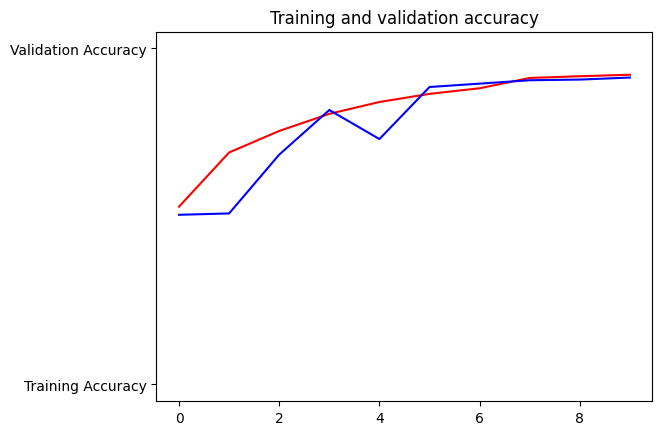

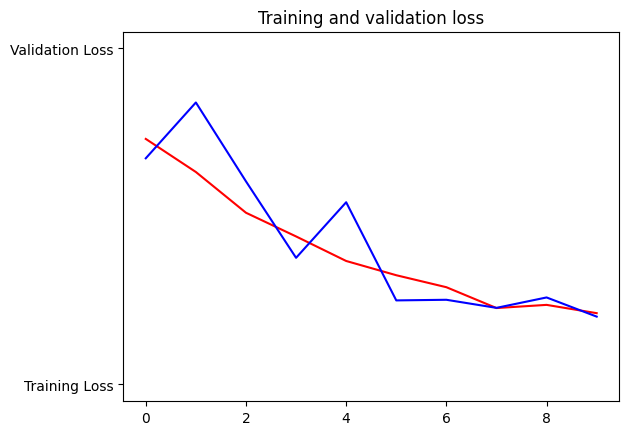

In [40]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [41]:
#save model
model.save('covid_model.h5')